<a href="https://colab.research.google.com/github/flediak/Euclid_IA_KP_paper0/blob/main/notebooks/plot_correlations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [149]:
from matplotlib import pyplot as plt
from matplotlib import ticker as mticker
import pandas as pd
import numpy as np

# install latex

In [29]:
!apt install texlive-latex-extra texlive-fonts-recommended dvipng cm-super

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  cm-super-minimal fonts-droid-fallback fonts-lato fonts-lmodern
  fonts-noto-mono fonts-texgyre ghostscript gsfonts javascript-common
  libcupsfilters1 libcupsimage2 libgs9 libgs9-common libijs-0.35 libjbig2dec0
  libjs-jquery libkpathsea6 libpotrace0 libptexenc1 libruby2.5 libsynctex1
  libtexlua52 libtexluajit2 libzzip-0-13 lmodern pfb2t1c2pfb poppler-data
  preview-latex-style rake ruby ruby-did-you-mean ruby-minitest
  ruby-net-telnet ruby-power-assert ruby-test-unit ruby2.5
  rubygems-integration t1utils tex-common tex-gyre texlive-base
  texlive-binaries texlive-latex-base texlive-latex-recommended
  texlive-pictures texlive-plain-generic tipa
Suggested packages:
  fonts-noto ghostscript-x apache2 | 

# download data and unzip

In [3]:
! gdown 1X_dKwoPWkNg3eWAh_qiWl6U81st5OK5y

Downloading...
From: https://drive.google.com/uc?id=1X_dKwoPWkNg3eWAh_qiWl6U81st5OK5y
To: /content/correlations.zip
100% 12.0k/12.0k [00:00<00:00, 4.06MB/s]


In [4]:
! unzip correlations.zip

Archive:  correlations.zip
   creating: correlations/
  inflating: correlations/corr_lowz-l3.csv  
  inflating: correlations/corr_lowz-l1.csv  
  inflating: correlations/corr_lowz-l2.csv  
  inflating: correlations/corr_lowz-l4.csv  
  inflating: correlations/corr_sdss-red.csv  
  inflating: correlations/corr_sdss-blue.csv  
  inflating: correlations/corr_hagn-z1p0m1.csv  
  inflating: correlations/corr_hagn-z1p0m2.csv  
  inflating: correlations/corr_hagn-z1p0m3.csv  
  inflating: correlations/corr_lowz-l2_ref.csv  
  inflating: correlations/corr_lowz-l1_ref.csv  
  inflating: correlations/corr_lowz-l3_ref.csv  
  inflating: correlations/corr_lowz-l4_ref.csv  
  inflating: correlations/corr_sdss-red_ref.csv  
  inflating: correlations/corr_sdss-blue_ref.csv  
  inflating: correlations/corr_hagn-z1p0m1_ref.csv  
  inflating: correlations/corr_hagn-z1p0m2_ref.csv  
  inflating: correlations/corr_hagn-z1p0m3_ref.csv  


# read data into dictionaries

In [32]:
corr_obs = {'lowz-l1':[],
            'lowz-l2':[],
            'lowz-l3':[],
            'lowz-l4':[],
            'sdss-red':[],
            'sdss-blue':[],
            }

corr_obs_ref = {'lowz-l1_ref':[],
            'lowz-l2_ref':[],
            'lowz-l3_ref':[],
            'lowz-l4_ref':[],
            'sdss-red_ref':[],
            'sdss-blue_ref':[],
            }

dir_corr = 'correlations/'

In [33]:
def read_correlations(dir_corr, dict_corr):

  for key in dict_corr:
    fname = dir_corr + 'corr_' + key + '.csv'
    dict_corr[key] = pd.read_csv(fname, sep = ',')

  return dict_corr

In [34]:
corr_obs = read_correlations(dir_corr, corr_obs)
corr_obs_ref = read_correlations(dir_corr, corr_obs_ref)

In [35]:
corr_obs['lowz-l1']

,rp,wgg,wggerr,wgp,wgperr
0,0.116418,5555.646078,1000.523439,-19.739982,48.845181
1,0.157784,3771.329960,404.100167,-2.656835,22.658091
2,0.213847,2832.613655,271.572681,11.513133,16.407295
3,0.289831,2082.008330,133.349308,9.177253,9.283546
4,0.392813,1561.346548,87.255051,-1.047363,5.488641
5,0.532386,1113.984453,66.086909,1.836829,3.297267
6,0.721552,854.587720,48.351452,1.236340,2.416079
7,0.977933,586.600919,33.694280,2.532211,1.541651
8,1.325410,413.933515,23.691975,2.399375,1.031852
9,1.796352,283.070290,16.991909,1.504434,0.693847


# plot $w_{gg}$

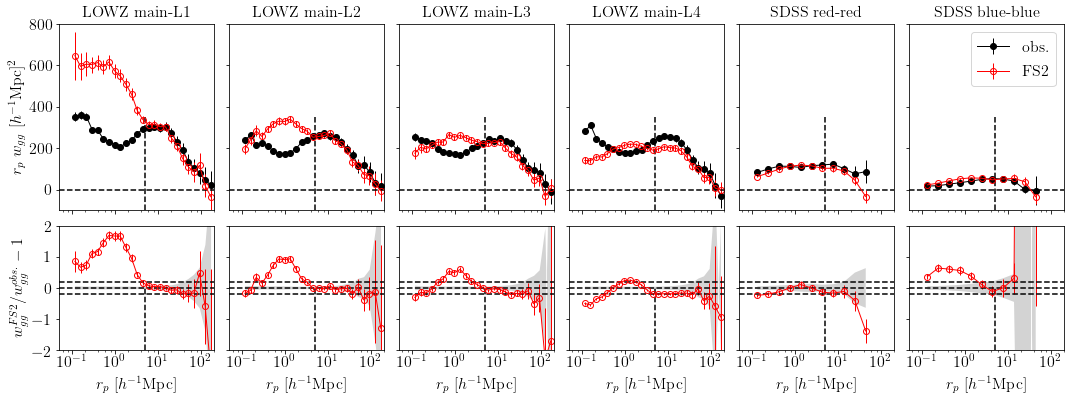

In [168]:
Ncol = len(corr_obs)

fig, ax = plt.subplots(2,Ncol,figsize=(Ncol*3,6), sharex=True, sharey='row', gridspec_kw={'height_ratios': [3, 2]})

fontsize = 16


#put correlations in list
corr = []
for key in corr_obs: 
  corr.append(corr_obs[key])

corr_ref = []
for key in corr_obs_ref: 
  corr_ref.append(corr_obs_ref[key])


# ============ wgg ==============
row = 0

for i in range(Ncol): 

  #reference
  ax[row,i].errorbar(corr_ref[i].rp,
                     corr_ref[i].rp*corr_ref[i].wgg,
                     corr_ref[i].rp*corr_ref[i].wggerr,
                     color='k',linestyle='-', lw=1, label='obs.', marker='o')
  
  #FS2
  ax[row,i].errorbar(corr[i].rp,
                     corr[i].rp*corr[i].wgg,
                     corr[i].rp*corr[i].wggerr,
                     color='r',linestyle='-', lw=1, label='FS2', marker='o', fillstyle='none')



# ============ wgg_sim / wgg_obs -1 ==============
row = 1

for i in range(Ncol): 

  ax[row,i].fill_between(
                    corr_ref[i].rp,
                    -corr_ref[i].wggerr / corr_ref[i].wgg,
                    corr_ref[i].wggerr / corr_ref[i].wgg,
                    facecolor='lightgrey', interpolate=True)

  ax[row,i].errorbar(corr[i].rp,
                     corr[i].wgg / corr_ref[i].wgg-1,
                     corr[i].wggerr / corr_ref[i].wgg,
                     color='r',linestyle='-', lw=1, label='FS2', marker='o', fillstyle='none')
    


# ================== config. ================
plt.rc('font', family='serif')
plt.rc('xtick', labelsize=fontsize)
plt.rc('ytick', labelsize=fontsize)
plt.rc('text', usetex=True)

# set spacing between panels
plt.subplots_adjust(wspace=0.1, hspace=0.1)

# axis labels
ax[0,0].set_ylabel(r'$r_p \ w_{gg} \ [h^{-1}\textrm{Mpc}]^2$',fontsize=fontsize)
ax[1,0].set_ylabel(r'$w_{gg}^{FS2} / w_{gg}^{obs.} - 1$',fontsize=fontsize)
#ax[1,0].set_ylabel(r'$\frac{w_{gg}^{FS2}}{w_{gg}^{obs.}} - 1$',fontsize=fontsize)

#titles
titles = ['LOWZ main-L1', 'LOWZ main-L2', 'LOWZ main-L3', 'LOWZ main-L4', 'SDSS red-red', 'SDSS blue-blue']
for i in range(Ncol):  
  ax[0,i].set_title(titles[i],fontsize=fontsize)



#out legend in last column
ax[0,-1].legend(fontsize=fontsize)


# set y-tics
ax[1,0].set_yticks(np.arange(-200, 1000, step=200))#top row
ax[1,0].set_yticks(np.arange(-10, 10, step=1))#bottom row


#settings for all columns
for col in range(Ncol):

  x_vline = 5

  row=0
  ax[row,col].set_ylim(-100,800)
  ax[row,col].axvline(x=x_vline, c='k', ymax=0.5, ls='--')
   
  row=1
  ax[row,col].set_ylim(-2,2)
  ax[row,col].axhline(y=-0.2, c='k', ls='--')
  ax[row,col].axhline(y=0.2, c='k', ls='--')
  ax[row,col].axvline(x=x_vline, c='k', ymax=0.5, ls='--')
  ax[row,col].set_xlabel(r'$r_p \ [h^{-1}\textrm{Mpc]}$',fontsize=fontsize)

  for row in range(2):
   
    ax[row,col].set_xlim(0.05,200)
    ax[row,col].set_xscale('log')
    ax[row,col].axhline(y=0, c='k', ls='--')
    #see https://matplotlib.org/stable/gallery/ticks/tick-locators.html
    ax[row, col].xaxis.get_major_locator().set_params(base=10,numticks=10)
    ax[row, col].xaxis.get_minor_locator().set_params(numticks=10, subs=[.2, .4, .6, .8])
    ax[row,col].tick_params(axis='both',labelsize=fontsize)

plt.savefig("wgg.pdf",bbox_inches='tight', pad_inches = 0.1)
plt.show()

# plot $w_{g+}$

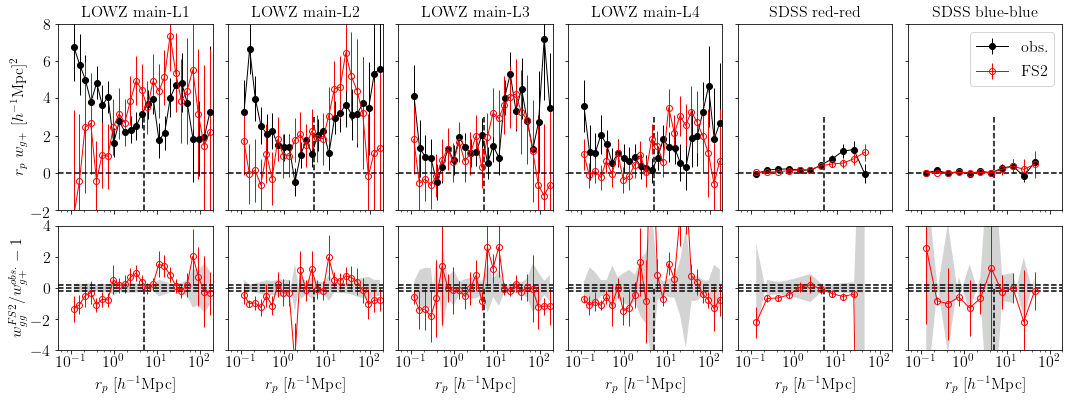

In [166]:
Ncol = len(corr_obs)

fig, ax = plt.subplots(2,Ncol,figsize=(Ncol*3,6), sharex=True, sharey='row', gridspec_kw={'height_ratios': [3, 2]})

fontsize = 16


#put correlations in list
corr = []
for key in corr_obs: 
  corr.append(corr_obs[key])

corr_ref = []
for key in corr_obs_ref: 
  corr_ref.append(corr_obs_ref[key])


# ============ wgp ==============
row = 0

for i in range(Ncol): 

  #reference
  ax[row,i].errorbar(corr_ref[i].rp,
                     corr_ref[i].rp*corr_ref[i].wgp,
                     corr_ref[i].rp*corr_ref[i].wgperr,
                     color='k',linestyle='-', lw=1, label='obs.', marker='o')
  
  #FS2
  ax[row,i].errorbar(corr[i].rp,
                     corr[i].rp*corr[i].wgp,
                     corr[i].rp*corr[i].wgperr,
                     color='r',linestyle='-', lw=1, label='FS2', marker='o', fillstyle='none')



# ============ wgp_sim / wgp_obs -1 ==============
row = 1

for i in range(Ncol): 

  ax[row,i].fill_between(
                    corr_ref[i].rp,
                    -corr_ref[i].wgperr / corr_ref[i].wgp,
                    corr_ref[i].wgperr / corr_ref[i].wgp,
                    facecolor='lightgrey', interpolate=True)

  ax[row,i].errorbar(corr[i].rp,
                     corr[i].wgp / corr_ref[i].wgp-1,
                     corr[i].wgperr / corr_ref[i].wgp,
                     color='r',linestyle='-', lw=1, label='FS2', marker='o', fillstyle='none')
    


# ================== config. ================
plt.rc('font', family='serif')
plt.rc('xtick', labelsize=fontsize)
plt.rc('ytick', labelsize=fontsize)
plt.rc('text', usetex=True)

# set spacing between panels
plt.subplots_adjust(wspace=0.1, hspace=0.1)

# axis labels
ax[0,0].set_ylabel(r'$r_p \ w_{g+} \ [h^{-1}\textrm{Mpc}]^2$',fontsize=fontsize)
ax[1,0].set_ylabel(r'$w_{gg}^{FS2} / w_{g+}^{obs.} - 1$',fontsize=fontsize)
#ax[1,0].set_ylabel(r'$\frac{w_{g+}^{FS2}}{w_{g+}^{obs.}} - 1$',fontsize=fontsize)

#titles
titles = ['LOWZ main-L1', 'LOWZ main-L2', 'LOWZ main-L3', 'LOWZ main-L4', 'SDSS red-red', 'SDSS blue-blue']
for i in range(Ncol):  
  ax[0,i].set_title(titles[i],fontsize=fontsize)



#out legend in last column
ax[0,-1].legend(fontsize=fontsize)


# set y-tics
ax[1,0].set_yticks(np.arange(-20, 100, step=20))#top row
ax[1,0].set_yticks(np.arange(-10, 10, step=2))#bottom row


#settings for all columns
for col in range(Ncol):

  x_vline = 5

  row=0
  ax[row,col].set_ylim(-2,8)
  ax[row,col].axvline(x=x_vline, c='k', ymax=0.5, ls='--')
   
  row=1
  ax[row,col].set_ylim(-4,4)
  ax[row,col].axhline(y=-0.2, c='k', ls='--')
  ax[row,col].axhline(y=0.2, c='k', ls='--')
  ax[row,col].axvline(x=x_vline, c='k', ymax=0.5, ls='--')
  ax[row,col].set_xlabel(r'$r_p \ [h^{-1}\textrm{Mpc]}$',fontsize=fontsize)

  for row in range(2):
   
    ax[row,col].set_xlim(0.05,200)
    ax[row,col].set_xscale('log')
    ax[row,col].axhline(y=0, c='k', ls='--')
    #see https://matplotlib.org/stable/gallery/ticks/tick-locators.html
    ax[row, col].xaxis.get_major_locator().set_params(base=10,numticks=10)
    ax[row, col].xaxis.get_minor_locator().set_params(numticks=10, subs=[.2, .4, .6, .8])
    ax[row,col].tick_params(axis='both',labelsize=fontsize)

plt.savefig("wgp.pdf",bbox_inches='tight', pad_inches = 0.1)
plt.show()

# download plots

In [169]:
from google.colab import files

In [170]:
files.download("wgg.pdf")
files.download("wgp.pdf")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>